**PROBLEM STATEMENT:**

Find and understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  And utilise this knowledge for portfolio and risk assessment. 

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



1.3.5


In [96]:
data=pd.read_csv("https://raw.githubusercontent.com/DevalapalleJaswanth/LoanDataSet/master/loan.csv");
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [98]:
data.columns


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [99]:
# To check Null values percentage each column 
(data.isnull().sum()/data.shape[0])*100  

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

**DATA UNDERSTANDING:**




*  Remove the columns with percentage of Null values more than 60-70. 
*  loan_amnt : The listed amount of loan applied for by the borrower.

*  loan_amnt : The listed amount of loan applied for by the borrower.
*  funded_amnt : The total amount committed to that loan at that point of time.
* funded_amnt_inv: The total amount committed by investors for tat loan at that point in time.
* grade: LC assigned loan grade
* loan_status: cuurent status of the loan( fully paid, charged off, current)
*  verification_status: Indicates whether income was verified by LC or not.


*   Remove all customer behavioural columns which are not available during the submission of loan


In [100]:
sub_data=data.loc[:,['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','term','grade','sub_grade','dti','verification_status','annual_inc','home_ownership','emp_length','delinq_2yrs','pub_rec_bankruptcies','loan_status']]
sub_data

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,term,grade,sub_grade,dti,verification_status,annual_inc,home_ownership,emp_length,delinq_2yrs,pub_rec_bankruptcies,loan_status
0,5000,5000,4975.0,10.65%,162.87,36 months,B,B2,27.65,Verified,24000.0,RENT,10+ years,0,0.0,Fully Paid
1,2500,2500,2500.0,15.27%,59.83,60 months,C,C4,1.00,Source Verified,30000.0,RENT,< 1 year,0,0.0,Charged Off
2,2400,2400,2400.0,15.96%,84.33,36 months,C,C5,8.72,Not Verified,12252.0,RENT,10+ years,0,0.0,Fully Paid
3,10000,10000,10000.0,13.49%,339.31,36 months,C,C1,20.00,Source Verified,49200.0,RENT,10+ years,0,0.0,Fully Paid
4,3000,3000,3000.0,12.69%,67.79,60 months,B,B5,17.94,Source Verified,80000.0,RENT,1 year,0,0.0,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,8.07%,78.42,36 months,A,A4,11.33,Not Verified,110000.0,MORTGAGE,4 years,0,NaN,Fully Paid
39713,8500,8500,875.0,10.28%,275.38,36 months,C,C1,6.40,Not Verified,18000.0,RENT,3 years,1,NaN,Fully Paid
39714,5000,5000,1325.0,8.07%,156.84,36 months,A,A4,2.30,Not Verified,100000.0,MORTGAGE,< 1 year,0,NaN,Fully Paid
39715,5000,5000,650.0,7.43%,155.38,36 months,A,A2,3.72,Not Verified,200000.0,MORTGAGE,< 1 year,0,NaN,Fully Paid


**DATA CLEANING**



*   Fill Null values with appropriate data using methods like mean, median,mode or some constant 
*   Remove rows or columns which have significant number of nulls


*  Loan status as Current means it is neither fully paid nor charged off, hence removing rows with loan status as current.

In [101]:
sub_data['emp_len_InYears']=sub_data['emp_length'].str.split(" ").str[-2]

sub_data['emp_len_InYears']=sub_data['emp_len_InYears'].str.replace('+', '.0').astype(float)

sub_data=sub_data[sub_data['emp_len_InYears'].notnull()]

sub_data=sub_data.fillna(0)

sub_data['term_in_mnths']=sub_data['term'].str.split(" ").str[1].astype(int)
sub_data.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
int_rate                0
installment             0
term                    0
grade                   0
sub_grade               0
dti                     0
verification_status     0
annual_inc              0
home_ownership          0
emp_length              0
delinq_2yrs             0
pub_rec_bankruptcies    0
loan_status             0
emp_len_InYears         0
term_in_mnths           0
dtype: int64

In [102]:
data_WOCurr=sub_data.loc[sub_data['loan_status']!='Current']
data_WOCurr['interest']=data_WOCurr['int_rate'].str.split("%").str[0].astype(float)
data_WOCurr=data_WOCurr.sort_values("interest")
data_WOCurr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,term,grade,sub_grade,dti,verification_status,annual_inc,home_ownership,emp_length,delinq_2yrs,pub_rec_bankruptcies,loan_status,emp_len_InYears,term_in_mnths,interest
13322,4500,4500,4500.00000,5.42%,135.72,36 months,A,A1,10.90,Not Verified,48000.00,MORTGAGE,8 years,0,0.0,Fully Paid,8.0,36,5.42
19583,4000,4000,4000.00000,5.42%,120.64,36 months,A,A1,3.21,Source Verified,57600.00,MORTGAGE,10+ years,0,0.0,Fully Paid,10.0,36,5.42
14180,1525,1525,1525.00000,5.42%,46.00,36 months,A,A1,5.34,Not Verified,65000.00,MORTGAGE,7 years,1,0.0,Fully Paid,7.0,36,5.42
10056,5000,5000,5000.00000,5.42%,150.80,36 months,A,A1,15.00,Source Verified,44000.00,RENT,7 years,0,0.0,Fully Paid,7.0,36,5.42
18755,7200,7200,7200.00000,5.42%,217.16,36 months,A,A1,15.78,Verified,60000.00,RENT,5 years,0,0.0,Fully Paid,5.0,36,5.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,25000,25000,24978.59515,23.91%,717.90,60 months,G,G4,9.55,Source Verified,200000.00,RENT,7 years,0,0.0,Fully Paid,7.0,60,23.91
1799,25000,25000,25000.00000,24.11%,720.80,60 months,G,G5,8.30,Verified,145000.00,MORTGAGE,4 years,0,0.0,Fully Paid,4.0,60,24.11
1619,24250,24250,24225.00000,24.11%,699.18,60 months,G,G5,12.27,Verified,108000.00,MORTGAGE,1 year,0,0.0,Fully Paid,1.0,60,24.11
5964,21250,21250,21225.00000,24.11%,612.68,60 months,G,G5,22.59,Verified,80000.00,RENT,5 years,0,0.0,Charged Off,5.0,60,24.11


**UNIVARIATE ANALYSIS :**

By doing Univariate analysis on term, int_rate,dti with loan_status as condition, we were able to decide where the maximum distribution is present and decide outliers as well.  

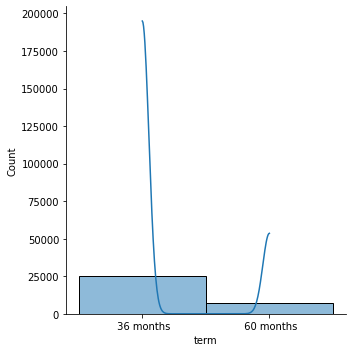

In [103]:
# Distribution plot of term , for loan status "Fully Paid"
term_good=data_WOCurr[data_WOCurr["loan_status"]=='Fully Paid']['term']

sns.displot(term_good,binwidth = 3, kde=True)

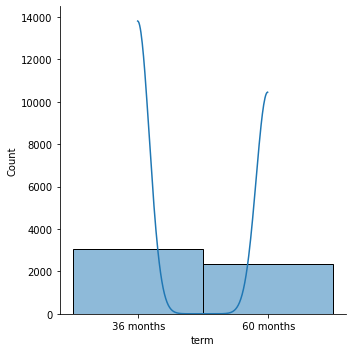

In [104]:
# Distribution plot of term , for loan status "Charged Off"
term_good=data_WOCurr[data_WOCurr["loan_status"]=='Charged Off']['term']

sns.displot(term_good,binwidth = 3, kde=True)

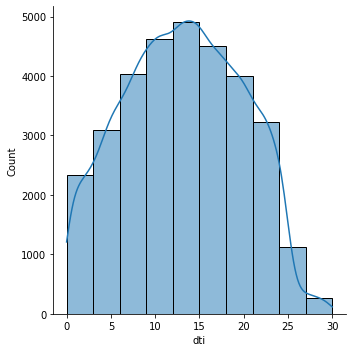

In [105]:
# Distribution plot of dti , for loan status "Fully Paid"
dti_good=data_WOCurr[data_WOCurr["loan_status"]=='Fully Paid']['dti']

sns.displot(dti_good,binwidth = 3, kde=True)

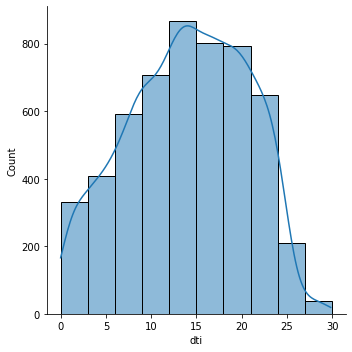

In [106]:
# Distribution plot of dti , for loan status "Charged Off"
dti_bad =data_WOCurr[data_WOCurr["loan_status"]=='Charged Off']['dti']
sns.displot(dti_bad,binwidth = 3, kde=True)

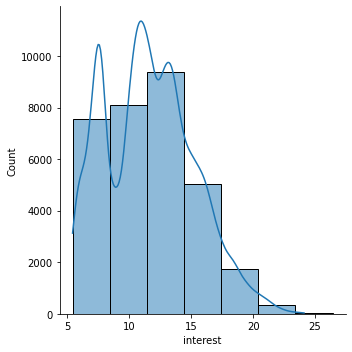

In [107]:
# Distribution plot of interest , for loan status "Fully Paid"
interest_good =data_WOCurr[data_WOCurr["loan_status"]=='Fully Paid']['interest']
sns.displot(interest_good,binwidth = 3, kde=True)

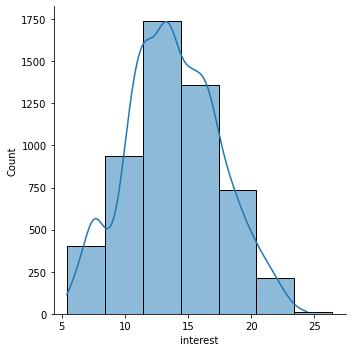

In [108]:
# Distribution plot of interest , for loan status "Charged Off"
interest_bad =data_WOCurr[data_WOCurr["loan_status"]=='Charged Off']['interest']
sns.displot(interest_bad,binwidth = 3, kde=True)

**BIVARIATE ANALYSIS :**

By doing Bivariate analysis like
1. "int_rate" and "loan_status" ,
2. "int_rate" and "term" with "loan_status" as condition ,
3. "dti" and "term" with "loan_status" as condition,
4. "annual_inc" and "term" with "loan_status" as condition

we were able to decide threshold values based on the relation ships or dependencies by which the "loan_status" can go to "Charged Off".

5. Heatmap plot tells the correlation between each of the variables. 

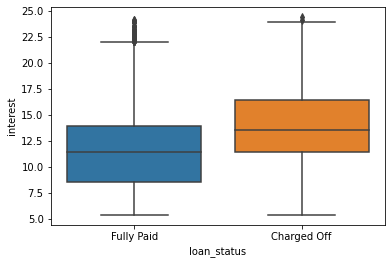

In [109]:
# box plot between interest and loan status
sns.boxplot(data=data_WOCurr, x="loan_status", y="interest" )

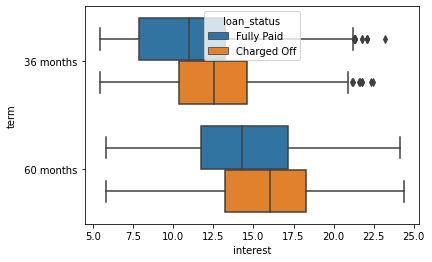

In [110]:
# box plot between interest and term of loan with loan status as criteria

sns.boxplot(data=data_WOCurr, x="interest", y="term", hue="loan_status")

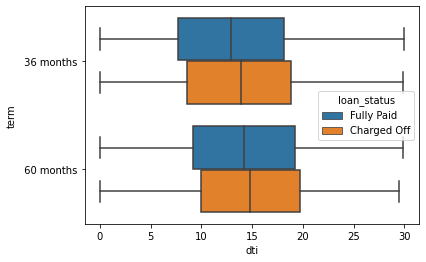

In [111]:
# box plot between dti and term of loan with loan status as criteria

sns.boxplot(data=data_WOCurr, x="dti", y="term", hue="loan_status")

[None]

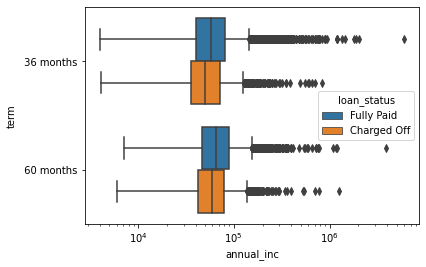

In [112]:
# box plot between annual income and term of loan with loan status as criteria
x=sns.boxplot(data=data_WOCurr, x="annual_inc", y="term", hue="loan_status")
x.set(xscale="log")

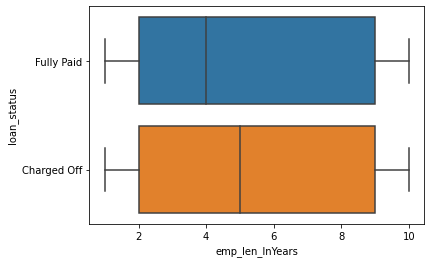

In [113]:
# box plot between employment length and  loan status 
x=sns.boxplot(data=data_WOCurr, x="emp_len_InYears", y="loan_status")


[None]

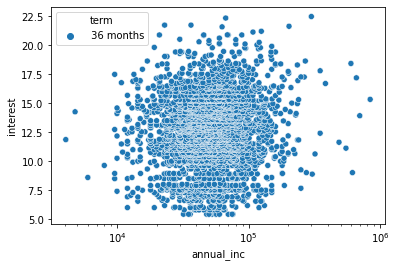

In [114]:
# Scatter plot between interest and annual income of loan with loan status as "Charged Off" and term="36 months"
bad =data_WOCurr[data_WOCurr["term"]==' 36 months']
bad=bad.loc[:,['loan_amnt','interest','annual_inc','loan_status','term']]
bad=bad[bad["loan_status"]=='Charged Off']
badplot=sns.scatterplot(data=bad, x='annual_inc', y="interest", hue="term")
badplot.set(xscale="log")
#badplot.set(yscale="log")

[None]

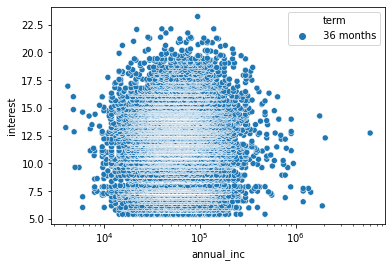

In [115]:
# Scatter plot between interest and annual income of loan with loan status as "Fully Paid" and term="36 months"
good =data_WOCurr[data_WOCurr["term"]==' 36 months']
good=good.loc[:,['loan_amnt','interest','annual_inc','loan_status','term']]
good=good[good["loan_status"]=='Fully Paid']
splot=sns.scatterplot(data=good, x='annual_inc', y="interest", hue="term")
splot.set(xscale="log")
#splot.set(yscale="log")

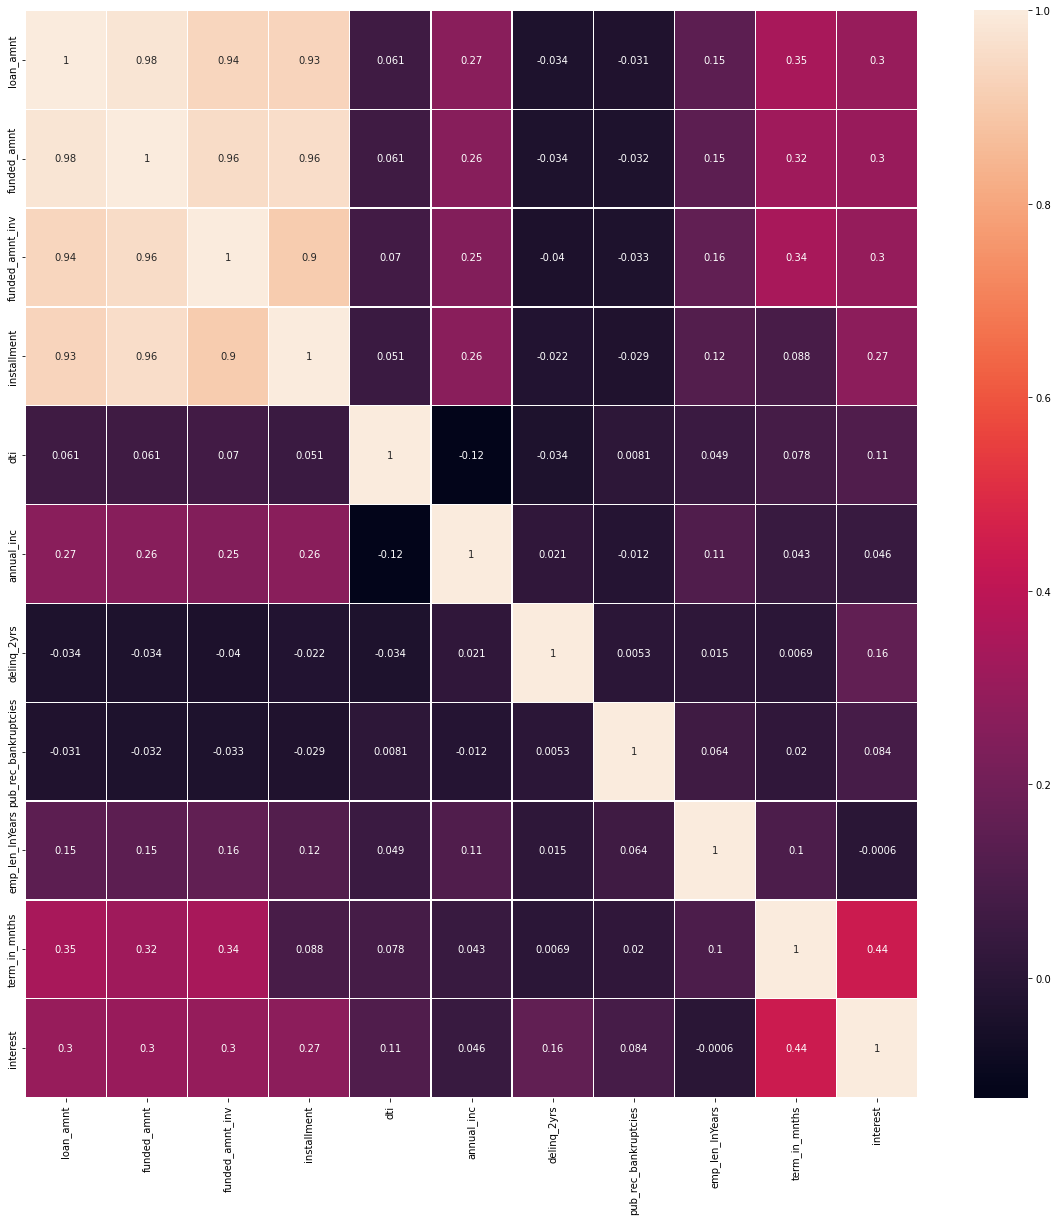

In [116]:
# correlation heatmap plot 
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data_WOCurr.corr(), linewidths=.3,annot=True)

**Conclusion:**


1.   [int_rate, annual_inc,dti,term ]  are the variables or driving factors which mainly tells about whether a borrower can go "Default" or "not".
2.   If "int_rate" is between 10% to 18%, mostly the borrower can go to "Default".
3.   For 36 months term, "int_rate" should be less than 13%.
4.   For 60 months term, "int_rate" should be less than 16%.
5.   and "dti" should be between 10 and 15.(ideally lesser the dti the better)
6. Good "annual_inc" greater than 50000. 







